In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
draft = pd.read_csv('Compound All Descriptors.csv')
draft.tail()

,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
283,439155,Inactive,0.0,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CSCCC(C(=O)O)...,10.690205,-1.170865,10.690205,0.211722,0.352410,384.418,...,0,0,1,0,0,0,0,0,1,0
284,257767,Inactive,0.0,C1=CC(=CC=C1N=NC2=CC(=C(C=C2N)N)N=NC3=CC=C(C=C...,12.509283,-3.800173,12.509283,0.034962,0.101424,640.758,...,0,0,0,2,0,0,2,0,0,0
285,281406,Inactive,0.0,CC(=O)C(C(=O)NC1=CC=C(C=C1)Cl)N=NC2=CC=C(C=C2)...,12.441214,-3.838339,12.441214,0.008609,0.374982,471.926,...,0,1,0,1,0,0,0,0,0,0
286,5472466,Inactive,0.0,C1=CC(=CC=C1C2=CC=C(O2)C=C3C(=NN4C(=NN=C4S3)CO...,14.604270,-0.642009,14.604270,0.003882,0.168894,666.776,...,0,0,1,0,0,0,0,0,0,0
287,5578857,Inactive,0.0,C1=CC(=C(C(=O)C2=C1C(=C(C(=C2O)O)O)Br)O)Br,11.932075,-0.865394,11.932075,0.048519,0.528724,377.972,...,0,0,0,0,0,0,0,0,0,0


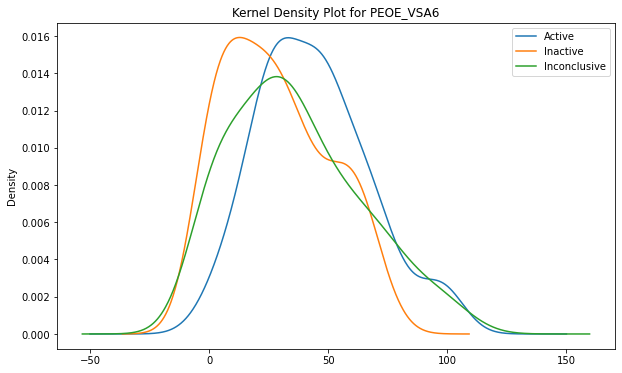

In [112]:
# Test 
molwt = draft[['PUBCHEM_ACTIVITY_OUTCOME', 'PEOE_VSA6']]
fig, ax = plt.subplots(figsize=(10,6))

for label, molwt in molwt.groupby('PUBCHEM_ACTIVITY_OUTCOME'):
    molwt.PEOE_VSA6.plot(kind="kde", label=label)
plt.legend()
plt.title('Kernel Density Plot for PEOE_VSA6')
plt.show()

In [5]:
df = draft.iloc[:, 4:]
df['Outcome'] = draft['PUBCHEM_ACTIVITY_OUTCOME']
print(df.columns)
print(len(df))

Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge',
       ...
       'fr_pyridine', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'Outcome'],
      dtype='object', length=187)
288


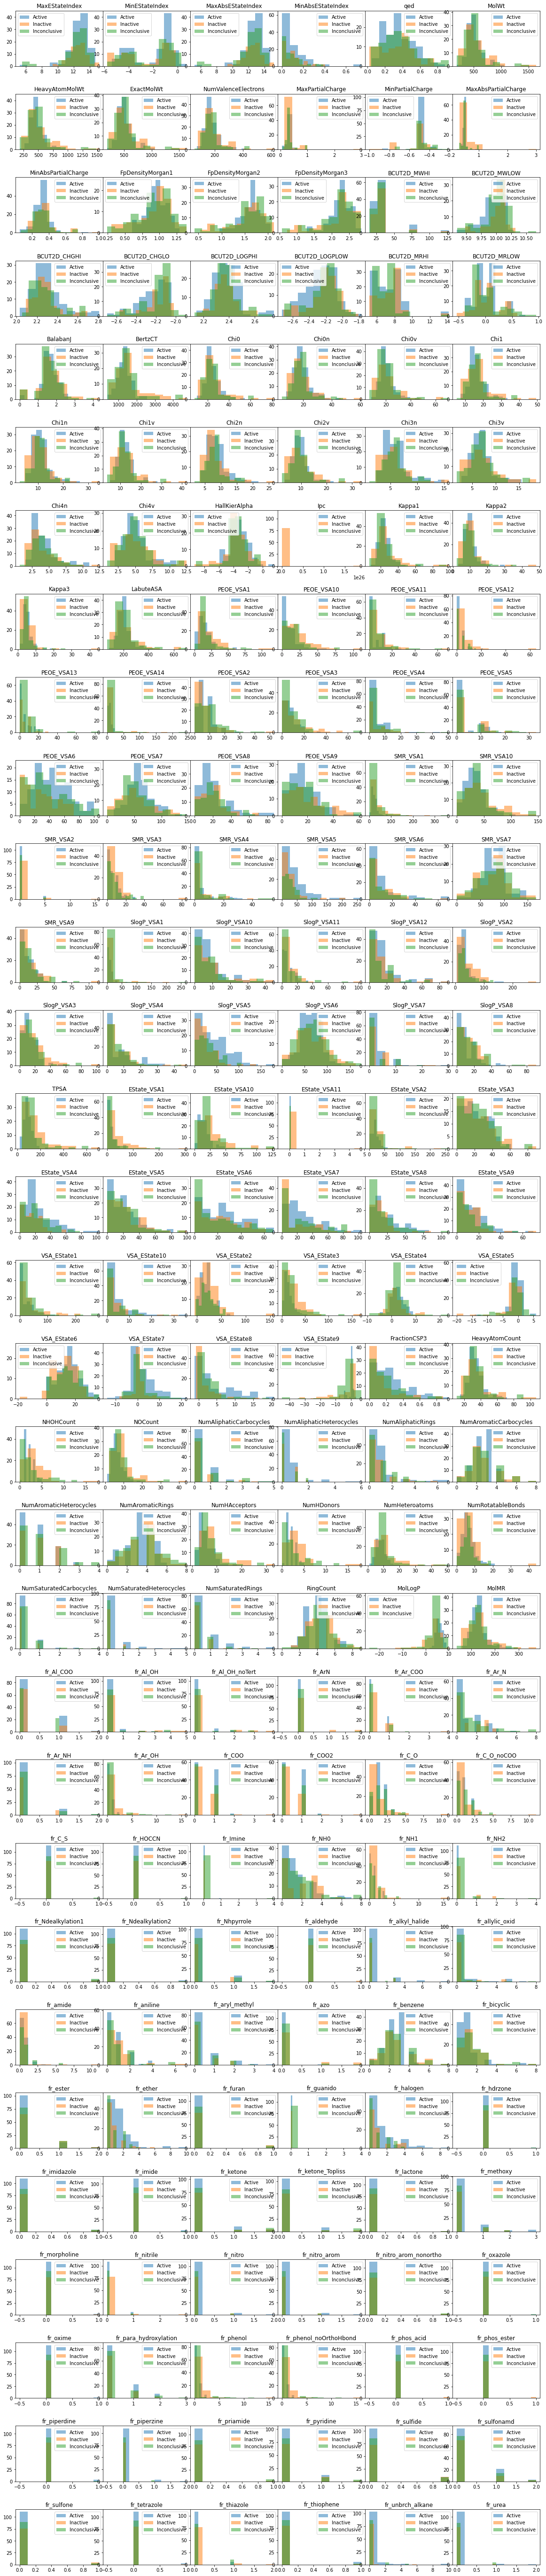

In [54]:
fig, axs = plt.subplots(31,6, figsize=(20, 100), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

colname = list(df.columns)

for i in range(186):
    
    for name, group in df.groupby('Outcome'):
        axs[i].hist(group[colname[i]], label=name, alpha = 0.5)
        axs[i].set_title(colname[i])
        axs[i].legend()

plt.savefig('histogram distribution.png')

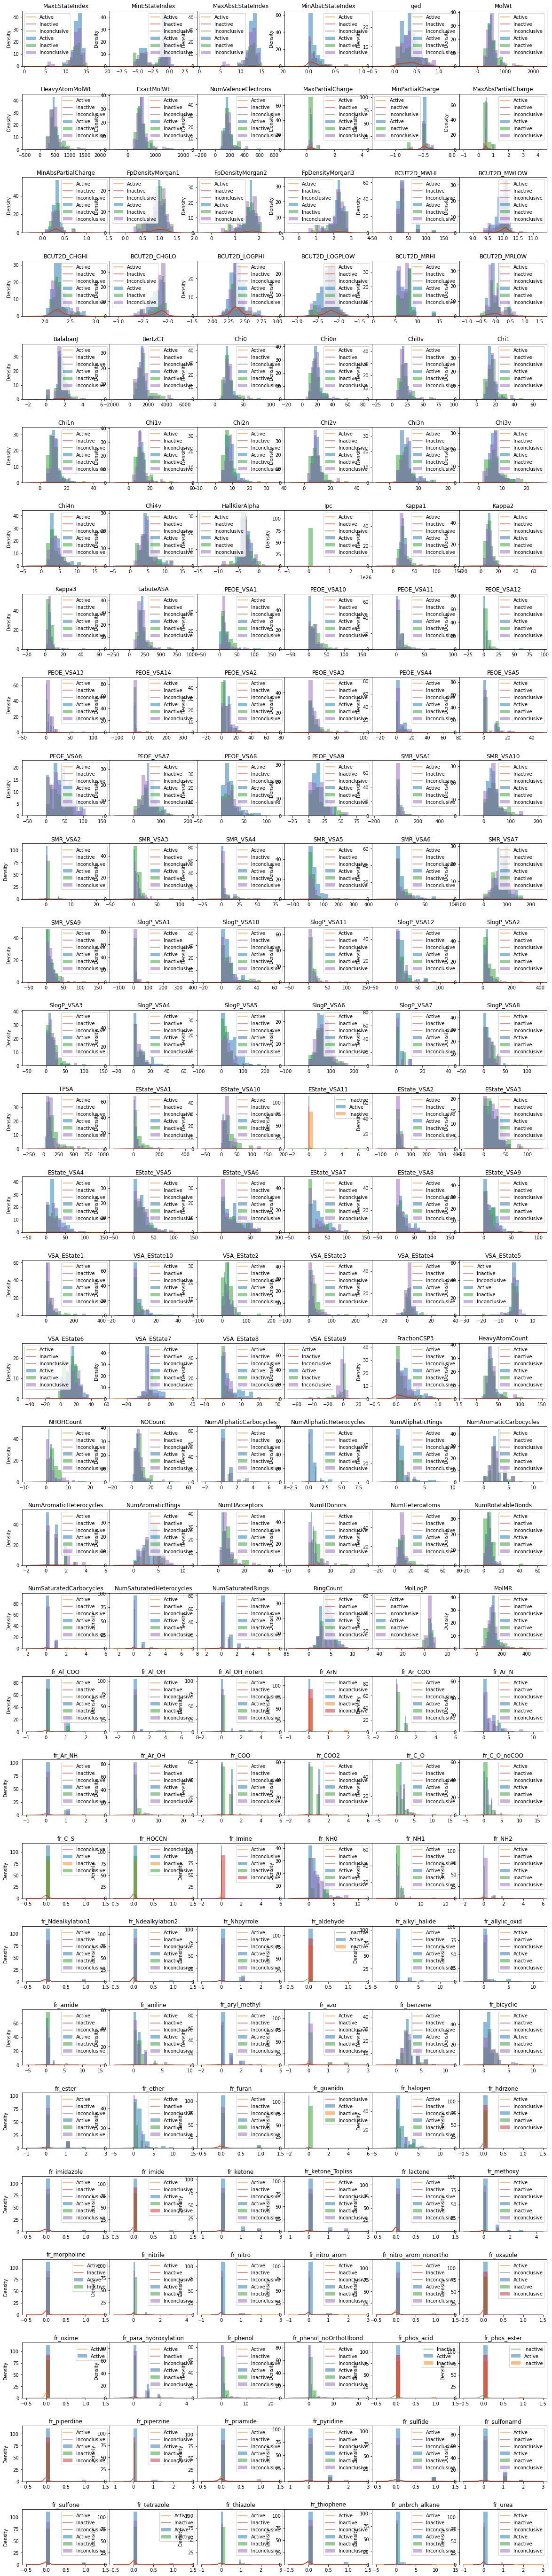

In [42]:
fig, axs = plt.subplots(31,6, figsize=(20, 100), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(186):
    for name, group in df.groupby('Outcome'):
        try:
            axs[i].hist(group[colname[i]], label=name, alpha = 0.5)
            group[colname[i]].plot.density(ax = axs[i], label=name, alpha = 0.7)
            axs[i].set_title(colname[i])
            axs[i].legend()
        except:
            axs[i].set_title(colname[i])
            pass

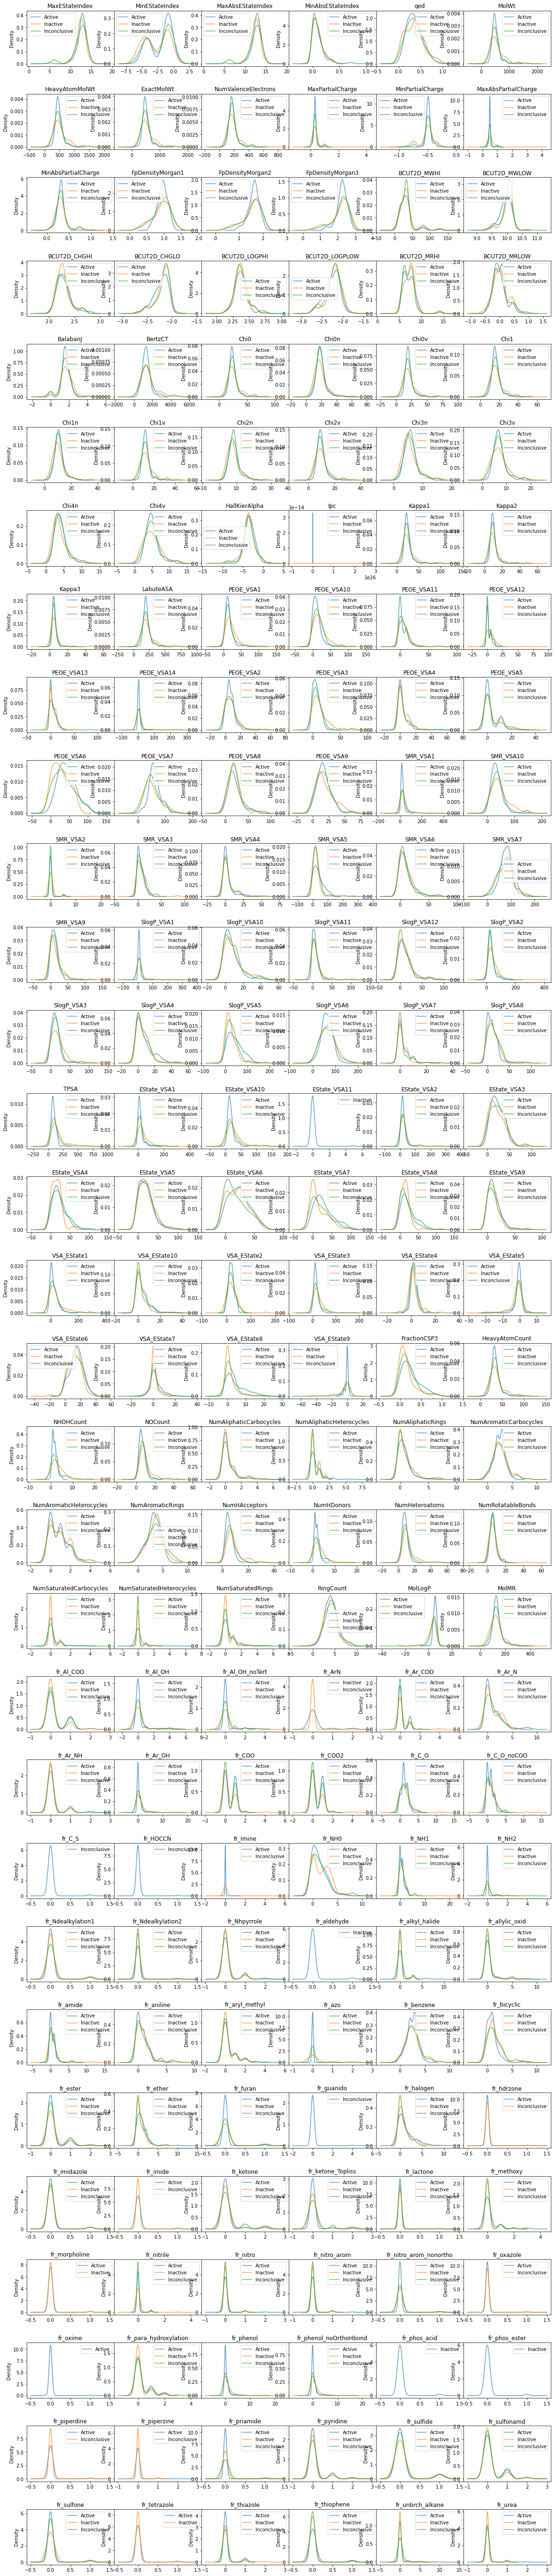

In [44]:
fig, axs = plt.subplots(31,6, figsize=(20, 100), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(186):
    for name, group in df.groupby('Outcome'):
        try:
            group[colname[i]].plot.kde(ax = axs[i], label=name, alpha = 0.7)
            axs[i].set_title(colname[i])
            axs[i].legend()
        except:
            axs[i].set_title(colname[i])
            pass

D:\Download\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Download\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Download\Anaconda\envs\my-rdkit-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

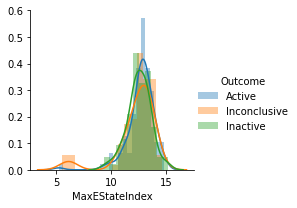

In [51]:
df1 = df.copy()
g = sns.FacetGrid(df1, hue="Outcome")
g.map(sns.distplot, colname[0])
g.add_legend()


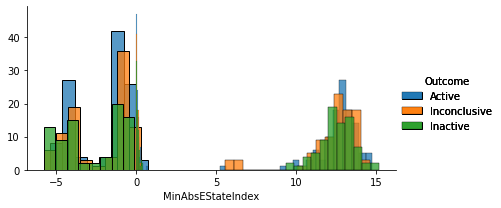

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [53]:
# for i in range(3):
    
#     for name, group in df.groupby('Outcome'):
#         sns.distplot(group[colname[i]], label = name)
#         axs[i].set_title(colname[i])
#         axs[i].legend() ####################### DOESN'T REALLY WORK

g = sns.FacetGrid(df, hue="Outcome")
for i in range(3):
    i+=1
    plt.figure(i)
    g.map(sns.histplot, colname[i])
    g.add_legend()


In [88]:
### Calculating KL Divergence
from scipy.special import rel_entr

# Pick the Ps and Qs
klact = df.loc[(df['Outcome'] == 'Active')]
klinact = df.loc[df['Outcome'] == 'Inactive']

TypeError: ufunc 'rel_entr' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [89]:
# print(klact['qed'])
# print(klinact['qed'].reset_index())
p = list(klact['qed'])[:81]
q = list(klinact['qed'])
kl_pq = rel_entr(p, q)
print(kl_pq)
print('KL(P || Q): %.3f nats' % sum(kl_pq))

kl_qp = rel_entr(klinact['qed'], klact['qed'])
print(kl_qp)
print('KL(P || Q): %.3f nats' % sum(kl_qp))

[ 0.17953158  0.48686363 -0.18373915  0.78154399 -0.16679887  1.84757459
  0.3467783  -0.21279681 -0.19754499 -0.07739992  0.1281408   0.04723126
  0.10755398  0.43546887 -0.08493332 -0.05513643  0.1697863   0.15761198
  0.11969725  0.42897519  0.27778241  0.07931646 -0.05940897 -0.06674382
  0.6498586  -0.19338031 -0.17534867  0.01406769  0.36112696  0.10561014
 -0.08334831 -0.09765438 -0.13878377 -0.06392093  0.09065101 -0.1617855
 -0.07069889 -0.13917271 -0.0711494  -0.07820598  0.24417605  0.04335832
 -0.1442115  -0.03834303 -0.08237567 -0.09527829 -0.15287896 -0.04939933
 -0.17620656 -0.12731897 -0.22632397  1.41676093  1.50382097  0.17549332
  0.12183947  0.04140152  0.44995435 -0.11988228  0.47573888  0.10360803
  0.15690013 -0.05406502  0.13680069 -0.23452653 -0.05103784 -0.23182398
  0.14759459 -0.1451441   0.02243021 -0.20874663  0.29733467  0.13711857
  0.7210295  -0.06703842 -0.16979785  0.40160032  0.12945259  0.23488259
  0.1043311   0.18934201 -0.09154691]
KL(P || Q): 9.

In [106]:
# Calculate kl
kl_pq = []
for i in range(len(colname)-1):
    p = list(klact[colname[i]])[:len(klinact)]
    q = list(klinact[colname[i]])
#     print(len(p))
#     print(len(q))
    kl_pqs = rel_entr(p,q)
    sum_klpqs = sum(kl_pqs)
    kl_pq.append(sum_klpqs)
print(kl_pq)

[24.55961217915679, inf, 24.55961217915679, inf, 9.226242905572143, 1617.7956051540957, 959.5978094227809, 1604.8859161750152, 1061.702983348895, 1.347270129610218, inf, -3.643580474137494, 1.6686636131783474, 7.231237040240884, 11.447029141845382, 16.14138872611344, 1218.429504258732, -6.514934078730256, 2.5985619920278875, inf, 1.7950402101937657, inf, 26.177416092286364, inf, 131.7358641680786, -3173.4659879393166, 108.56127649686218, 217.6691633348036, 155.40670567282248, 88.39224686371091, 158.92764199754365, 92.26788876449628, 166.66544483703245, 110.18941751671451, 125.19096132357036, 88.58286582353601, 99.884019661171, 73.36133430508038, inf, 721631975643778.9, 128.5741120891536, 112.71698866405589, 96.4679734794458, 957.649804903853, 138.76236988197152, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, -314.89273357853887, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 490.056622878811, inf, inf, inf, inf, inf, inf, -2451.051083122945, inf, -238.485

In [104]:
kl_qp = []
for i in range(len(colname)-1):
    p = list(klact[colname[i]])[:len(klinact)]
    q = list(klinact[colname[i]])
    kl_qps = rel_entr(q,p)
    sum_klqps = sum(kl_qps)
    kl_qp.append(sum_klqps)
print(kl_qp)
print(len(kl_qp))

[-0.6368889127428038, inf, -0.6368889127428038, inf, 7.156739246719675, 6152.78061841929, 6699.826085860663, 6146.456802222106, 1966.875736197815, 18.9789326375878, inf, 12.43283737589211, 7.2781569006388525, 0.5720437986761845, -0.7650055088477224, -1.8958047334343169, 621.7999792928726, 7.11919482509879, -1.171098490854832, inf, -1.0732373848949701, inf, 23.887068409639024, inf, 78.08789008027155, 35459.11865635423, 288.92505280229244, 112.66524723289157, 180.4973005565511, 156.97440013714115, 36.542550032850116, 122.07437604862595, 17.31232286159732, 91.9263860626988, 13.063479644373494, 59.824488884494045, 14.525789369708571, 44.23583070976208, inf, 8.751324503987662e+27, 372.3297566295746, 126.42137321472805, 141.35382358940674, 2154.3585744351008, 1539.2965000480278, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, -32.881894137363986, inf, inf, 3527.035731026974, inf, inf, inf, inf, inf, inf, 513.746022909101, inf, inf, inf, inf, inf, 2757.59950819135, inf, inf, inf, 1180.54033

In [107]:
kl_diver = pd.DataFrame(
    {'colname': list(klact.columns)[:186],
     'kl_pq': kl_pq,
     'kl_qp': kl_qp
    })

kl_diver

,colname,kl_pq,kl_qp
0,MaxEStateIndex,24.559612,-0.636889
1,MinEStateIndex,inf,inf
2,MaxAbsEStateIndex,24.559612,-0.636889
3,MinAbsEStateIndex,inf,inf
4,qed,9.226243,7.156739
...,...,...,...
181,fr_tetrazole,0.000000,inf
182,fr_thiazole,inf,inf
183,fr_thiophene,inf,inf
184,fr_unbrch_alkane,inf,inf


In [110]:
# pd.set_option('display.max_columns', None)
kl_diver.to_csv('kl_diver.csv', index = False)